- There is building data that contains information  
  about the building in which it is located and the purpose of the building.
- Using this data, I will try to understand the characteristics of each region.
- For example, is it close to a residential district or a commercial district?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' 

### Read file
- raw data name : "건축물연령공간정보" - 부산광역시 중구
- raw data source : The National Spatial Information Portal (http://openapi.nsdi.go.kr/nsdi/index.do)

In [2]:
df = pd.read_csv('./data/국가공간정보포털_건축물연령정보_부산중구.csv',
                sep='\t', encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동명      6536 non-null   object 
 1   건물연면적     6536 non-null   float64
 2   건축물구조명    6534 non-null   object 
 3   주요용도명     6535 non-null   object 
 4   건물높이      6533 non-null   float64
 5   지상층수      6536 non-null   int64  
 6   지하층수      6518 non-null   float64
 7   건물연령      4448 non-null   float64
 8   geometry  6536 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 459.7+ KB


- First, since there are too many regions to be classified,  
  create a large group column grouped by adjacent districts.

In [4]:
print(df['법정동명'].isnull().sum())
df['법정동명'].unique()

0


array(['부산광역시 중구 영주동', '부산광역시 중구 대창동1가', '부산광역시 중구 대창동2가',
       '부산광역시 중구 중앙동1가', '부산광역시 중구 중앙동2가', '부산광역시 중구 중앙동3가',
       '부산광역시 중구 중앙동4가', '부산광역시 중구 중앙동5가', '부산광역시 중구 중앙동6가',
       '부산광역시 중구 동광동1가', '부산광역시 중구 동광동2가', '부산광역시 중구 동광동3가',
       '부산광역시 중구 동광동4가', '부산광역시 중구 동광동5가', '부산광역시 중구 대청동1가',
       '부산광역시 중구 대청동2가', '부산광역시 중구 대청동3가', '부산광역시 중구 대청동4가',
       '부산광역시 중구 보수동1가', '부산광역시 중구 보수동2가', '부산광역시 중구 보수동3가',
       '부산광역시 중구 부평동1가', '부산광역시 중구 부평동2가', '부산광역시 중구 부평동3가',
       '부산광역시 중구 부평동4가', '부산광역시 중구 신창동1가', '부산광역시 중구 신창동2가',
       '부산광역시 중구 신창동3가', '부산광역시 중구 신창동4가', '부산광역시 중구 창선동1가',
       '부산광역시 중구 창선동2가', '부산광역시 중구 광복동1가', '부산광역시 중구 광복동2가',
       '부산광역시 중구 광복동3가', '부산광역시 중구 남포동1가', '부산광역시 중구 남포동2가',
       '부산광역시 중구 남포동3가', '부산광역시 중구 남포동4가', '부산광역시 중구 남포동5가',
       '부산광역시 중구 남포동6가'], dtype=object)

In [5]:
df['법정동명_L'] = np.nan

df['법정동명_L'] = np.where(df['법정동명'].str.contains('영주동'), '영주동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('보수동'), '보수동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('대청동'), '대청동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('동광동'), '동광동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('부평동'), '부평동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('광복동'), '광복동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('남포동'), '남포동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('중앙동'), '중앙동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('신창동'), '신창동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('창선동'), '창선동', df['법정동명_L'])
df['법정동명_L'] = np.where(df['법정동명'].str.contains('대창동'), '대창동', df['법정동명_L'])

In [6]:
print(df['법정동명_L'].isnull().sum())
df['법정동명_L'].value_counts()

0


법정동명_L
보수동    1379
영주동    1339
부평동     905
대청동     833
동광동     554
중앙동     497
남포동     463
신창동     240
광복동     161
창선동      95
대창동      70
Name: count, dtype: int64

- There is one missing value in the building use column,  
  which is the column subject to analysis,  
  but it is ignored and proceeded with.

In [7]:
print(df['주요용도명'].isnull().sum())
df['주요용도명'].unique()

1


array(['공동주택', '단독주택', '제1종근린생활시설', '제2종근린생활시설', '숙박시설', '공장', '노유자시설',
       '종교시설', '업무시설', '교육연구시설', '운동시설', '창고시설', '문화및집회시설', '자동차관련시설',
       '판매시설', '의료시설', '위락시설', '운수시설', '판매및영업시설', '방송통신시설', '위험물저장및처리시설',
       '관광휴게시설', nan, '발전시설', '수련시설', '근린생활시설'], dtype=object)

- Using a pivot table,
  count the number of buildings for each use  
  by region based on the region classification column created above.
- Since the 'count' function excludes missing values,  
  it can be seen that data related to the single missing value identified immediately above is removed.

In [8]:
df['건물수'] = 1

pv_df = df.pivot_table(index='법정동명_L', columns='주요용도명', values='건물수', 
                      aggfunc='count', fill_value=0,)

pv_df

주요용도명,공동주택,공장,관광휴게시설,교육연구시설,근린생활시설,노유자시설,단독주택,문화및집회시설,발전시설,방송통신시설,...,위락시설,위험물저장및처리시설,의료시설,자동차관련시설,제1종근린생활시설,제2종근린생활시설,종교시설,창고시설,판매및영업시설,판매시설
법정동명_L,,,,,,,,,,,,,,,,,,,,,
광복동,0,0,1,1,1,0,19,1,0,0,...,1,0,0,1,87,36,1,2,0,0
남포동,1,0,0,1,2,0,71,1,0,0,...,4,0,0,5,147,144,0,23,0,14
대창동,4,0,0,2,0,0,23,0,0,0,...,0,0,0,0,15,14,0,1,0,0
대청동,282,0,0,8,0,3,348,3,1,0,...,2,0,7,5,84,61,11,3,0,0
동광동,68,0,1,3,0,1,318,2,0,0,...,3,0,1,2,57,54,0,3,0,0
보수동,307,4,0,13,0,5,802,1,0,0,...,1,0,1,5,103,111,4,2,0,1
부평동,32,1,0,1,0,3,345,0,0,0,...,18,0,3,5,224,209,3,17,0,3
신창동,3,1,0,1,0,1,47,0,0,0,...,0,0,1,4,134,43,1,1,0,1
영주동,215,2,0,10,0,9,890,2,0,0,...,0,0,1,1,103,76,6,1,0,1


- Visualize the pivot table as a stacked bar chart to check the usage mix by region.
- Looking at the chart below,  
  there are so many uses that it is difficult to intuitively check the characteristics of each region.

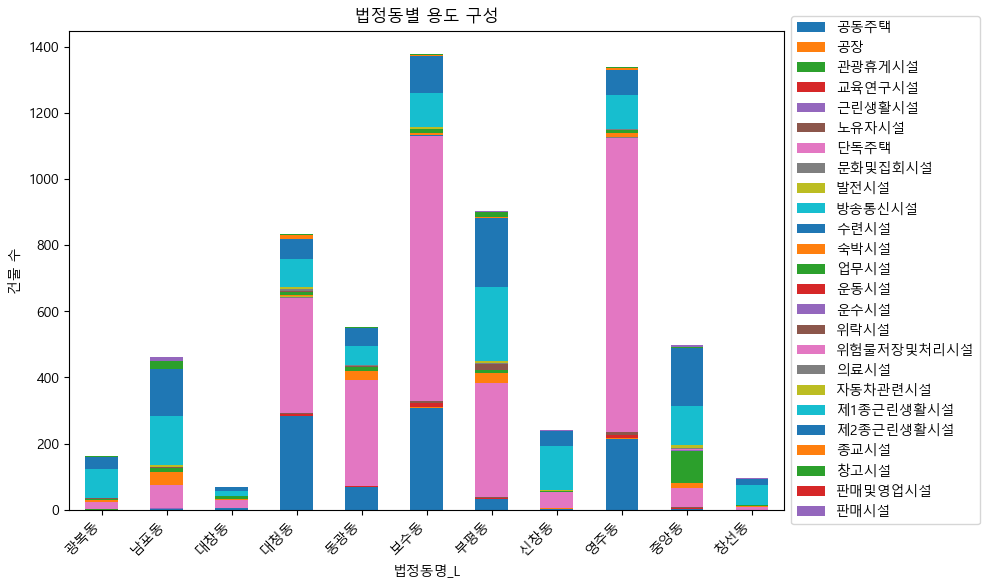

In [9]:
ax = pv_df.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_ylabel('건물 수')
ax.set_title('법정동별 용도 구성')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

- To focus more on the major uses,  
  the top five uses are selected for each region,  
  and the number of buildings for the remaining uses are totaled in the 'Other' column.

In [10]:
def top_5_with_others(x):
    top_5 = x.nlargest(5)
    others = x.drop(top_5.index).sum()
    return pd.concat([top_5, pd.Series([others], index=['기타'])])

top_5_df = pv_df.apply(top_5_with_others, axis=1)

In [11]:
top_5_df

,공동주택,교육연구시설,기타,단독주택,숙박시설,업무시설,자동차관련시설,제1종근린생활시설,제2종근린생활시설,창고시설
법정동명_L,,,,,,,,,,
광복동,NaN,NaN,9.0,19.0,7.0,3.0,NaN,87.0,36.0,NaN
남포동,NaN,NaN,39.0,71.0,39.0,NaN,NaN,147.0,144.0,23.0
대창동,4.0,NaN,7.0,23.0,NaN,7.0,NaN,15.0,14.0,NaN
대청동,282.0,NaN,46.0,348.0,NaN,12.0,NaN,84.0,61.0,NaN
동광동,68.0,NaN,29.0,318.0,27.0,NaN,NaN,57.0,54.0,NaN
보수동,307.0,13.0,43.0,802.0,NaN,NaN,NaN,103.0,111.0,NaN
부평동,32.0,NaN,64.0,345.0,31.0,NaN,NaN,224.0,209.0,NaN
신창동,3.0,NaN,9.0,47.0,NaN,NaN,4.0,134.0,43.0,NaN
영주동,215.0,NaN,42.0,890.0,13.0,NaN,NaN,103.0,76.0,NaN


- By drawing a chart with data selecting the top five uses for each region,  
  I can better see the characteristics of each region.
- '대청동', '동광동', '보수동', '영주동' can be seen as residential districts  
  with a high proportion of residential buildings in total buildings,  
  while the remaining areas are close to commercial districts.

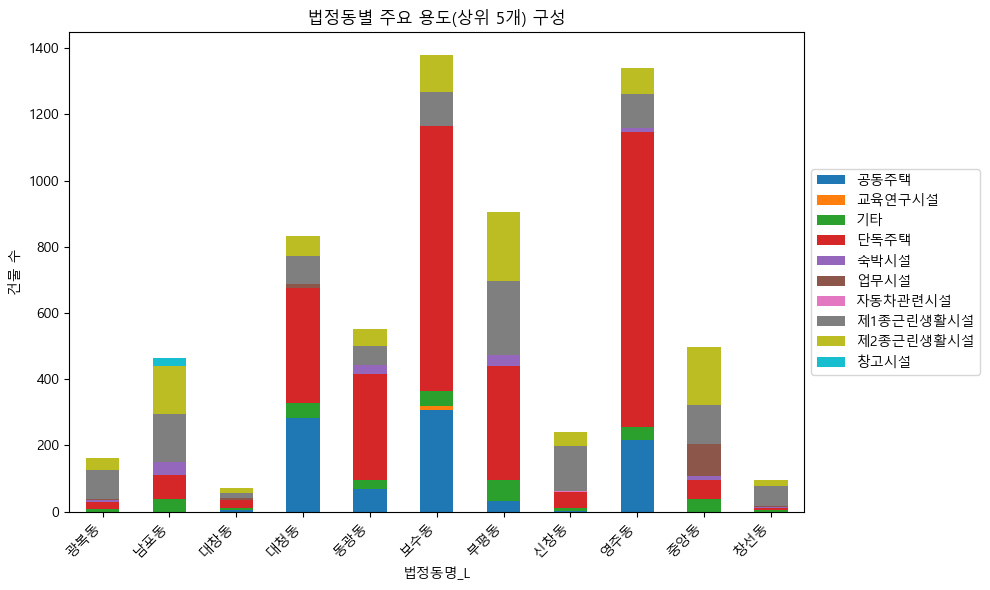

In [12]:
ax = top_5_df.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_ylabel('건물 수')
ax.set_title('법정동별 주요 용도(상위 5개) 구성')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()